In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('cell_samples.csv')
raw_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


* Plot to understand the distribution of classes based on clump thickness and uniformity of cell size

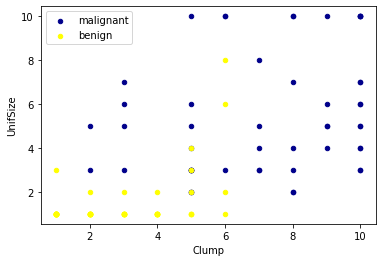

In [3]:
ax = raw_data[raw_data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
raw_data[raw_data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

### Exploratory Data Analysis

In [6]:
(raw_data.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
raw_data = raw_data[pd.to_numeric(raw_data['BareNuc'], errors='coerce').notnull()]
raw_data['BareNuc'] = raw_data['BareNuc'].astype('int')
raw_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
X = raw_data.iloc[:,1:-1].values
y = raw_data.iloc[:,-1].values


### Split the data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=40)

### Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [13]:
from sklearn.svm import SVC

In [15]:
model_fit = SVC(kernel='rbf')
model_fit = model_fit.fit(X_train,y_train)

C:\Users\Arjun Janamatti\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
predict_values = model_fit.predict(X_test)
predict_values

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4,
       4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 2], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_test, predict_values))

Accuracy score:  0.9708029197080292


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        87
           4       0.96      0.96      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion matrix, without normalization
[[85  2]
 [ 2 48]]


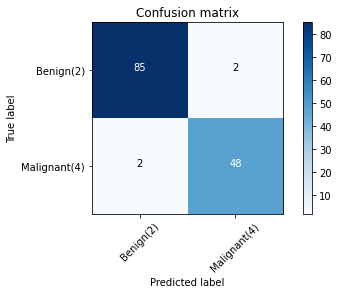

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_values, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, predict_values))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, predict_values, average='weighted') 

0.9708029197080292

In [24]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predict_values)

0.9708029197080292